# Videogames statistics project

The goal of this project : short EDA of videogames dataset

There are columns in the dataset:

- Rank – the rank of the sales volume
- Name – the name of the game
- Platform – platform, on which videogame was issued 
- Genre – genre of the game
- Publisher – publisher of the game
- NA_Sales – sales in North America, millions dollars
- EU_Sales – sales in Europe, millions dollars
- JP_Sales – sales in Japan, millions dollars
- Other_Sales – sales in other countries, millions dollars
- Global_Sales – sales for all the world, millions dollars


In this project I will answer for several questions: 


1. Upload the data and make sure that everything is correct: look at the columns, size, missing values (if any, delete). I will also explore the types of variables

2. Let's plot the distribution of the number of games released by year and output the descriptive characteristics of the Year variable

3. Let's find out which platforms had the most releases

4. Let's see which publishers of games are the most popular in the dataset

5. Let's answer the question: in which region is the median value of sales of Nintendo games the largest?

6. Let's figure out the sales volumes of Nintendo games in Japan by genre. Let's look at the median, the mean, the interquartile range.

7. Visualize the dynamics of changes in global sales by year for Nintendo games of the following genres: Fighting, Simulation, Platform, Racing, Sports. Let's answer the question: at what points in time were the most games of the Sports genre sold?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

### 1. Загрузка данных и изучение типа переменных

In [2]:
# read the data, use method info() to find out more information

games = pd.read_csv('/Users/oksana_khoroshun/Documents/Python/games.csv') 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Types of variables in dataset:
			
| Column | Type of variable | 
| --- | --- |
| Rank | rank | 
|Name | nominal |	
|Platform | nominal |						
|Genre | nominal |				
|Publisher | nominal |			
|Year | discrete |		
|NA_Sales | continuous |			
|EU_Sales | continuous |				
|JP_Sales | continuous |				
|Other_Sales | continuous |				
|Global_Sales | continuous |

In [3]:
# show the first 5 rows

games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# drop missing values

games.dropna(subset=['Year', 'Publisher'], inplace=True)

In [5]:
# make names of columns in lowercase

games.columns = [x.lower() for x in games.columns]

### 2. Distribution of issued games graphs by year and describing characters of Year variable

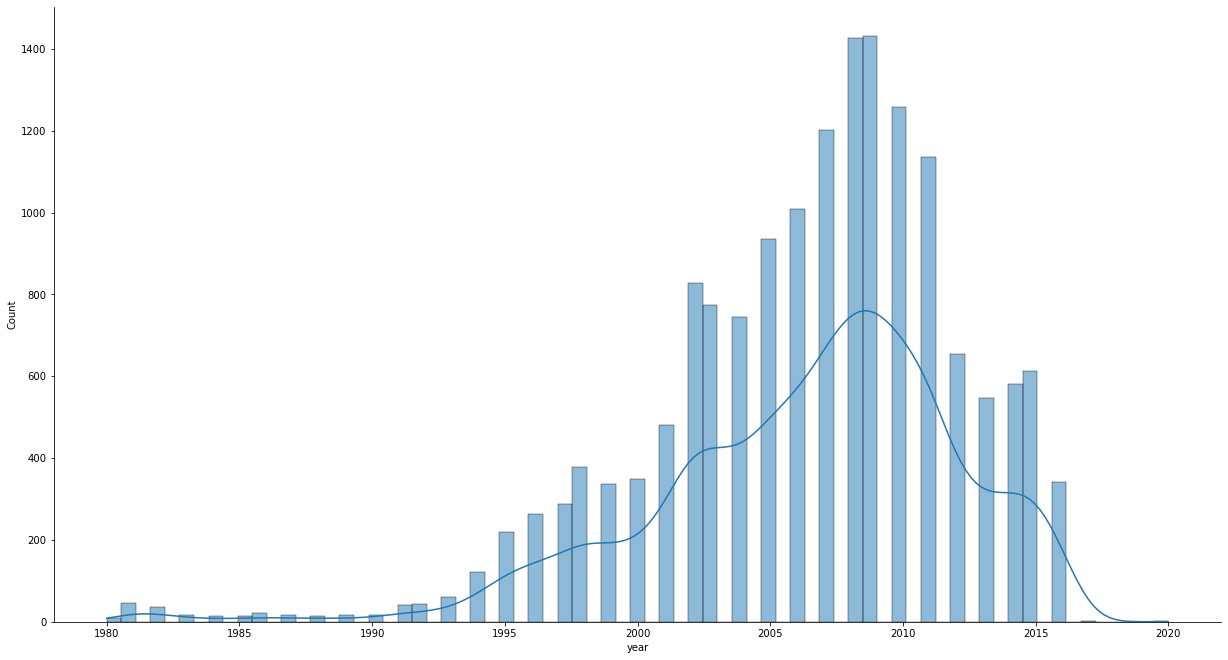

In [6]:
g = sns.displot(data=games,
            x='year',
            kde=True)

g.figure.set_figwidth(20)
g.figure.set_figheight(10)

In [7]:
games.year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

From descibing characters of year column I see that:

1. Mode is 2009 
2. Mediane is bigger than mean
3. Approximately half of issued games was in 2007

### 3.  Platforms with the most releases
 
Find out which platforms have frequency more than 7%

In [8]:
# calculate frequency in % and save it in platform_percent variable

platform_percent = games.platform.value_counts(normalize=True) * 100

In [9]:
platform_percent 

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: platform, dtype: float64

In [10]:
# reset indexes for futher exploration


platform_percent = platform_percent.to_frame(name='value').reset_index()

In [11]:
# rename the columns in new dataframe platform_percent

platform_percent = platform_percent.rename(columns= {'index': 'platform'})

In [12]:
# sort platforms, which have frequency more than 7%

platform_percent.query('value > 7.0')

,platform,value
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508


So there are 7 platforms, which have frequency more than 7%:
DS, PS2, PS3, Wii, X360, PSP, PS

### 4. The most popular publisher

Find out, which publisher is the most popular. I will use the mode method

In [13]:
scipy.stats.mode(games.publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

So Electronic Arts is the most popular publisher according my dataset

### 5.  Exploration Nintendo games

Let's find out in which region the median of sales volume Nintendo games is the biggest.

In [14]:
# select the Nintendo games

games_nintendo = games[games['publisher'] == 'Nintendo']


In [15]:
# figure out the describing statistics

games_nintendo.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


As I see the biggest median of sales volume Nintendo games is in North America.


Let's find out the sales volume Nintendo games in Japan by genres.

I will build boxplot where:

- axis x is contain genres
- axis у is a sales volume in Japan (JP_sales)


<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

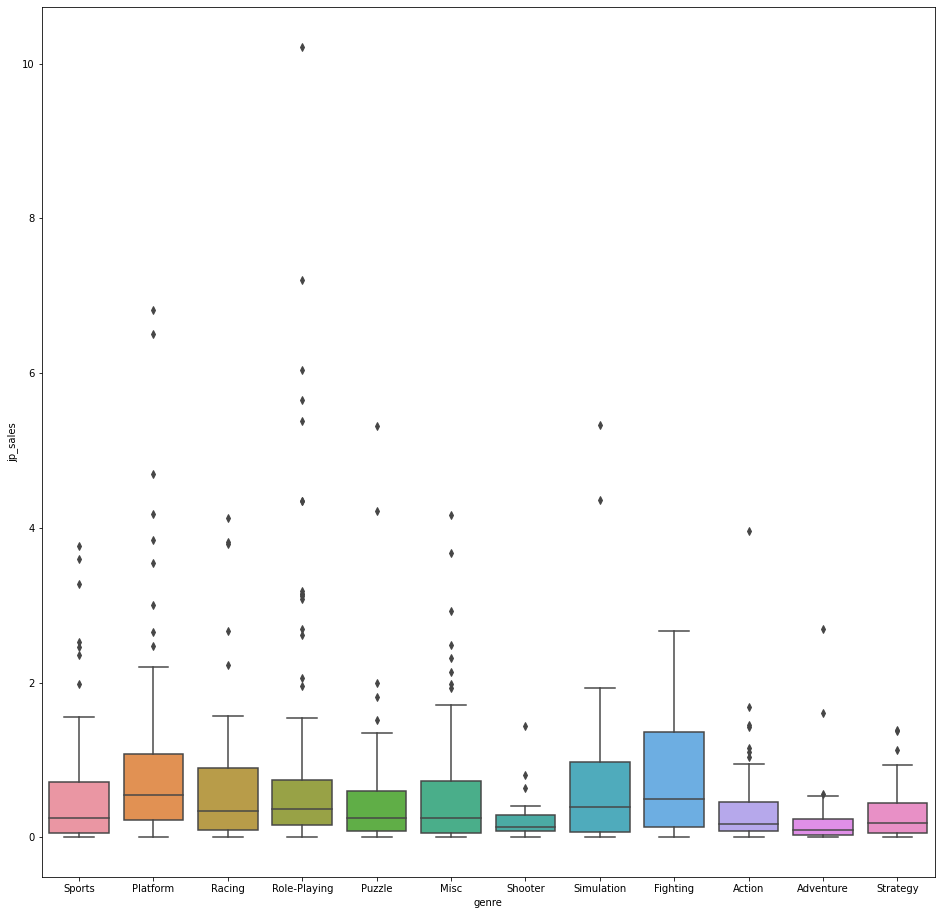

In [16]:
plt.figure(figsize=(16,16))
sns.boxplot(x='genre', y='jp_sales', data=games_nintendo)

According the graphs I see that:
1. The greatest interquartile range is observed in games of the genre Fighting
2. The median value of sales of Fighting genre games is higher than that of Simulation games
3. The interquartile range of Strategy is smaller than interquartile range of Puzzle

### 6. Visualisation of clobal sales volume changes  by years for Nintendo games 

Let's visualize the dynamics of changing clobal sales volume by years for Nintendo games for next genres: Fighting, Simulation, Platform, Racing, Sports.

In [17]:
# find out the genres frequencies for Nintendo games

games_nintendo.genre.value_counts()

Platform        111
Role-Playing    105
Misc            100
Action           78
Puzzle           74
Sports           55
Racing           37
Adventure        35
Strategy         31
Simulation       28
Shooter          24
Fighting         18
Name: genre, dtype: int64

In [18]:
# select necessary columns and genres in a new variable

games_nintendo_global = games_nintendo[['year', 'genre', 'global_sales']] \
                        .query("genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")


In [19]:
games_nintendo_global

,year,genre,global_sales
0,2006.0,Sports,82.74
1,1985.0,Platform,40.24
2,2008.0,Racing,35.82
3,2009.0,Sports,33.00
6,2006.0,Platform,30.01
...,...,...,...
12123,2010.0,Sports,0.07
12770,2005.0,Simulation,0.06
14626,2006.0,Sports,0.03
14968,2016.0,Simulation,0.02


<AxesSubplot:xlabel='year', ylabel='global_sales'>

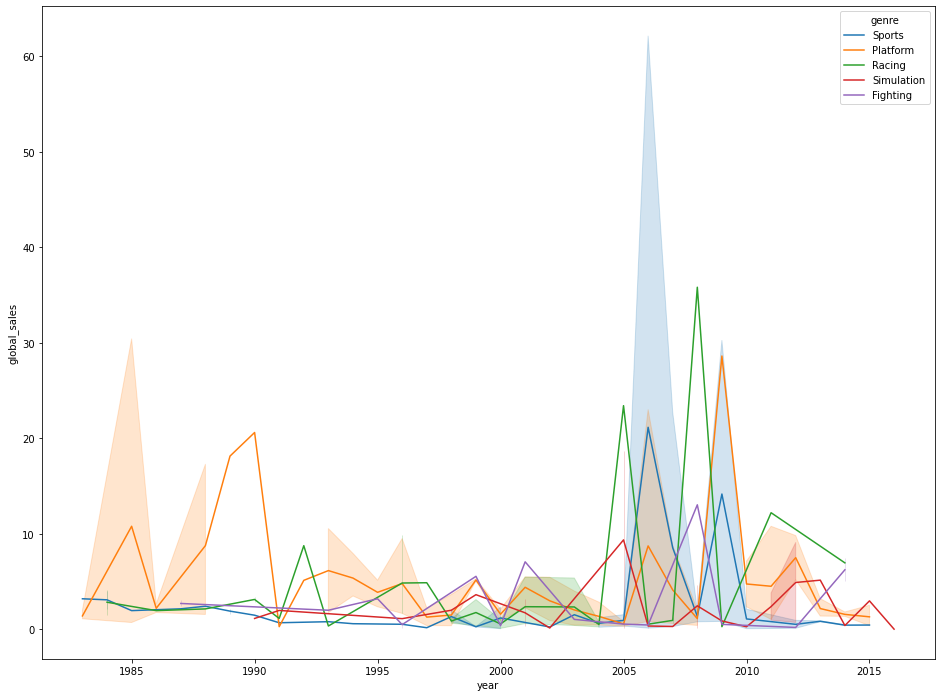

In [20]:
# build line plot

plt.figure(figsize=(16,12))
sns.lineplot(x = 'year', y = 'global_sales', hue = 'genre', data=games_nintendo_global)

Thus I see that the largest number of copies of games of the Sports genre were sold during the period 2005-2010.

## Conclusion

In this project, I studied data about video games:

1. I plotted the distribution of the number of games released by year and saw that the largest number of games released was achieved in 2008-2009.

2. I found out that the DS, PS2, PS3, Wii, X360, PSP, PS platforms had the most releases

3. I found out that the games of the publisher Electronic Arts are found in the dataset most often

4. I calculated that the median value of sales volume is the largest in the North America region

5. I visualized the sales volumes of Nintendo games in Japan by genre and found out that the greatest interquartile range is observed in Fighting genre games

6. I visualized the dynamics of changes in global sales (Global_Sales) by year for Nintendo games in the Fighting, Simulation, Platform, Racing, Sports genres and found out that in 2005-2010 the largest number of copies of Sports genre games were sold.
